# Numerical Integration and Differentiation

## Q1
First, we implement all the required algorithms for numerical differentiation.

In [48]:
def forward_diff(f,x,h=0.00001):
    '''
    f: Python function, takes one argument (float) and returns float
    x: float
    h: float
    Computes the derivative of the function f at x using forward difference
    uses h as the step value, set to a default of 0.00001
    '''
    return (f(x+h) - f(x))/h

def backward_diff(f,x,h=0.00001):
    '''
    f: Python function, takes one argument (float) and returns float
    x: float
    h: float
    Computes the derivative of the function f at x using backward difference
    uses h as the step value, set to a default of 0.00001
    '''
    return (f(x) - f(x-h))/h

def central_diff(f,x,h=0.00001):
    '''
    f: Python function, takes one float argument and returns float
    x: float
    h: float
    Computes the derivative of the function f at x
    Uses central difference
    Uses h as the step length, it is set to the defauly value of 0.00001
    '''
    return (f(x+h) - f(x-h))/(2*h)

def fivePoint_diff(f,x,h=0.00001):
    '''
    f: Python function, takes one float argument and returns float
    x: float
    h: float
    Computes the derivative of the function f at x
    Uses the 5-point approximation
    h is the step size, set to a default value of 0.00001
    '''
    h2 = 2*h
    return (f(x-h2) - 8*f(x-h) + 8*f(x+h) - f(x+h2))/(12*h)

### (a)

In [49]:
from math import sin, pi

#Values of h that the computation needs to be carried over
h = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]

#Target value of x for which the derivative is to be evaluated
x = (2*pi)/5

#Algorithms that will be used
alg = [forward_diff, backward_diff, central_diff, fivePoint_diff]

#Names of the algorithms, for display purposes
algName = ["FD", "BD", "CD", "5D"]

#main loop
print("  | ",end='')
for i in h:
    print(f" {i} |",end='')

print()

estimates = dict() #Dictionary indexed by algName, holds f'(x) at all values of h

for i in range(len(alg)):
    print(algName[i]+"|",end='')
    hs = []
    for j in h:
        val = alg[i](sin,x,j)
        print(f"{val: .4f}|",end='')
        hs.append(val)
    print()
    estimates[algName[i]] = list(hs) #Need to copy the 1D list, it gets reset

  |  0.5 | 0.2 | 0.1 | 0.05 | 0.02 | 0.01 | 0.005 | 0.002 | 0.001 | 0.0005 | 0.0002 | 0.0001 |
FD| 0.0634| 0.2122| 0.2610| 0.2851| 0.2995| 0.3043| 0.3066| 0.3081| 0.3085| 0.3088| 0.3089| 0.3090|
BD| 0.5292| 0.4018| 0.3560| 0.3327| 0.3185| 0.3138| 0.3114| 0.3100| 0.3095| 0.3093| 0.3091| 0.3091|
CD| 0.2963| 0.3070| 0.3085| 0.3089| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090|
5D| 0.3084| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090|


### (b)

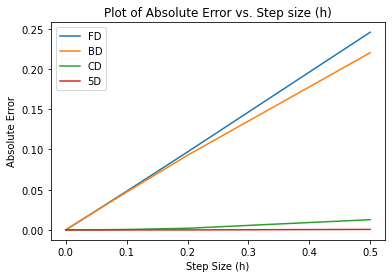

In [50]:
#Exact derivative of sin, as we know
from math import cos

exact = cos(x)

errors = dict() #Holds the errors, indexed by algName

#Calculating the absolute errors
for i in range(len(alg)):
    a = algName[i]
    hE = []
    for j in range(len(h)):
        hE.append(abs(estimates[a][j] - exact))
    errors[a] = list(hE)

import matplotlib.pyplot as plt

plt.title("Plot of Absolute Error vs. Step size (h)")
plt.xlabel("Step Size (h)")
plt.ylabel("Absolute Error")

for i in algName:
    plt.plot(h,errors[i],label = i)

plt.legend()
plt.show()

### (c)

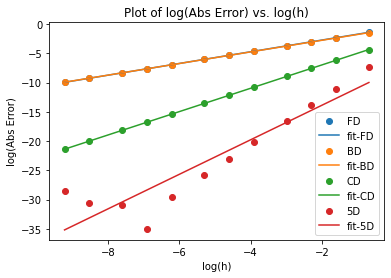

SLOPES of Linear Fit for all methods -> 
FD: 1.002818380118227
BD: 0.9945608990283744
CD: 1.9992408011625247
5D: 2.9570776996625683


In [51]:
from math import log

logErrors = dict()

for i in algName:
    logErr = []
    for j in range(len(h)):
        logErr.append(log(errors[i][j]))
    logErrors[i] = list(logErr)

logH = [log(i) for i in h]

#Now, we fit the log(Abs Err) vs log(h)
from scipy.optimize import curve_fit

#Normal, linear curve
def linear(x, a, b):
    return a*x + b

params = dict()
covs = dict()

for i in algName:
    params[i], covs[i] = curve_fit(linear, logH, logErrors[i])

plt.title("Plot of log(Abs Error) vs. log(h)")
plt.xlabel("log(h)")
plt.ylabel("log(Abs Error)")

for i in algName:
    plt.scatter(logH, logErrors[i], label=i)
    fitY = [linear(j,params[i][0],params[i][1]) for j in logH]
    plt.plot(logH, fitY, label=str("fit-"+i))

plt.legend()
plt.show()

print("SLOPES of Linear Fit for all methods -> ")
for i in algName:
    print(f"{i}: ",end='')
    print(params[i][0])

### (c) - Errors analysed
Note that we have a distinct accumulation of **floating point** errors near the smaller values of h for 5 Point Method, causing it to get "worse" as h decreases. This is wrong representation for two reasons - 
1. The fit is of course bad (will be demonstrated below) - clearly because the data has a downward trend for a part of the data, and an upward trend after
2. The floating point error is strictly dependant on the machine which runs the code (and perhaps the kernel).

To be more precise in this representation, we will **remove the lowest 3 points from the log(Abs Error) data**

In [52]:
from numpy import diag, sqrt

print("Errors in fitting (derived from covariance matrix) -> ")
for i in algName:
    print(f"{i}: ",end='')
    e = sqrt(diag(covs[i]))
    print(f"a = {e[0]}, b = {e[1]}")

print("Notice how the errors are remarkably larger for 5D")

Errors in fitting (derived from covariance matrix) -> 
FD: a = 0.0007082761174464742, b = 0.004003566050037197
BD: a = 0.0018694320595609118, b = 0.01056705790090754
CD: a = 0.000333442031119659, b = 0.0018847976957410476
5D: a = 0.3835248590775807, b = 2.1678933859838256
Notice how the errors are remarkably larger for 5D


  |  0.5 | 0.2 | 0.1 | 0.05 | 0.02 | 0.01 | 0.005 | 0.002 |
FD| 0.0634| 0.2122| 0.2610| 0.2851| 0.2995| 0.3043| 0.3066| 0.3081|
BD| 0.5292| 0.4018| 0.3560| 0.3327| 0.3185| 0.3138| 0.3114| 0.3100|
CD| 0.2963| 0.3070| 0.3085| 0.3089| 0.3090| 0.3090| 0.3090| 0.3090|
5D| 0.3084| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090| 0.3090|


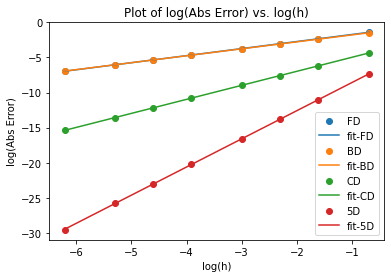

SLOPES of Linear Fit for all methods -> 
FD: 1.005279164175487
BD: 0.9891917376368284
CD: 1.9984543571566313
5D: 4.0119582460273655
Updated Errors in Fit -> 
FD: a = 0.0011494825766061834, b = 0.004462156278879801
BD: a = 0.003551202987106397, b = 0.013785352524739366
CD: a = 0.000690670816569079, b = 0.00268110292990226
5D: a = 0.009585938647114196, b = 0.037211486169491444


In [53]:
#Values of h that the computation needs to be carried over
h = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002] #Smallest 4 values are now removed

#Target value of x for which the derivative is to be evaluated
x = (2*pi)/5

#Algorithms that will be used
alg = [forward_diff, backward_diff, central_diff, fivePoint_diff]

#Names of the algorithms, for display purposes
algName = ["FD", "BD", "CD", "5D"]

#main loop
print("  | ",end='')
for i in h:
    print(f" {i} |",end='')

print()

estimates = dict() #Dictionary indexed by algName, holds f'(x) at all values of h

for i in range(len(alg)):
    print(algName[i]+"|",end='')
    hs = []
    for j in h:
        val = alg[i](sin,x,j)
        print(f"{val: .4f}|",end='')
        hs.append(val)
    print()
    estimates[algName[i]] = list(hs) #Need to copy the 1D list, it gets reset

#Calculating the absolute errors
for i in range(len(alg)):
    a = algName[i]
    hE = []
    for j in range(len(h)):
        hE.append(abs(estimates[a][j] - exact))
    errors[a] = list(hE)

from math import log

logErrors = dict()

for i in algName:
    logErr = []
    for j in range(len(h)):
        logErr.append(log(errors[i][j]))
    logErrors[i] = list(logErr)

logH = [log(i) for i in h]

#Now, we fit the log(Abs Err) vs log(h)
from scipy.optimize import curve_fit

#Normal, linear curve
def linear(x, a, b):
    return a*x + b

params = dict()
covs = dict()

for i in algName:
    params[i], covs[i] = curve_fit(linear, logH, logErrors[i])

plt.title("Plot of log(Abs Error) vs. log(h)")
plt.xlabel("log(h)")
plt.ylabel("log(Abs Error)")

for i in algName:
    plt.scatter(logH, logErrors[i], label=i)
    fitY = [linear(j,params[i][0],params[i][1]) for j in logH]
    plt.plot(logH, fitY, label=str("fit-"+i))

plt.legend()
plt.show()

print("SLOPES of Linear Fit for all methods -> ")
for i in algName:
    print(f"{i}: ",end='')
    print(params[i][0])
    
print("Updated Errors in Fit -> ")
for i in algName:
    print(f"{i}: ",end='')
    e = sqrt(diag(covs[i]))
    print(f"a = {e[0]}, b = {e[1]}")

Clearly, we can now say that all the fit parameters are on the same order of magnitude. Thus, we can now compare the efficiencies.
The efficiencies of the methods, ranked in descending order:
1. 5 Point Difference
2. Central Difference
3. Forward Difference
4. Backward Difference

## Q2
First, we define the algorithms to be used

In [87]:
def trap_int(f,a,b,h):
    '''
    f: Python function, takes one float, returns float
    a: float
    b: float
    h: float
    Numerically integrates the function f on [a,b] using trapezoidal rule
    '''
    p = []
    i = a
    while i <= b:
        p.append(i)
        i += h
    s = 0
    for i in p:
        s += 2*f(i)
    s = s - f(p[0]) - f(p[-1])
    return s*(h/2)

def simpson13_int(f,a,b,h):
    '''
    f: Python function, takes one float, returns float
    a: float
    b: float
    h: float
    Numerically integrates the function f on [a,b] using Simpson's 1/3 rule
    '''
    p = []
    i = a
    while i <= b:
        p.append(i)
        i += h
    s = f(p[0]) + f(p[-1])
    for i in range(1,len(p)-1):
        if i%2 == 0:
            s += 2*f(p[i])
        else:
            s+= 4*f(p[i])
    return s*(h/3)

def simpson38_int(f,a,b,h):
    '''
    f: Python function, takes one float, returns float
    a: float
    b: float
    h: float
    Numerically integrates the function f on [a,b] using Simpson's 3/8 rule
    '''
    p = []
    i = a
    while i <= b:
        p.append(i)
        i += h
    s = f(p[0]) + f(p[-1])
    for i in range(1,len(p)-1):
        if i%3 == 0:
            s += 2*f(p[i])
        else:
            s += 3*f(p[i])
    return s*((3*h)/8)

def boole_int(f,a,b,h):
    '''
    f: Python function, takes one float, returns float
    a: float
    b: float
    h: float
    Numerically integrates the function f on [a,b] using Boole's rule
    '''
    p = []
    i = a
    while i <= b:
        p.append(i)
        i += h
    s = 7*(f(p[0]) + f(p[-1]))
    for i in range(1,len(p)-1):
        if i%4 == 0:
            s += 14*f(p[i])
        elif i%2 == 0 and i%4 != 0:
            s += 12*f(p[i])
        else:
            s += 32*f(p[i])
    return s*((2*h)/45)

### (a)

In [88]:
from math import exp

#Defined values of N in question
N = [20,200,2000,20000]

est = dict()

algName = ["TRA","S13","S38","BOO"]

alg = [trap_int, simpson13_int, simpson38_int, boole_int]
#Adjust the values of N as required - taking the next highest appropriate value
adjustedN = {
    "TRA": [20,200,2000,20000],
    "S13": [22,202,2002,20002], #(N-1) needs to be multiple of 3
    "S38": [22,202,2002,20002], #(N-1) needs to be multiple of 3
    "BOO": [21,201,2001,20001], #(N-1) needs to be multiple of 5
}

print("   |",end='')
for i in N:
    print(f" {1/(i-1): .4f}|",end='')

print()

for i in range(len(algName)):
    print(algName[i]+"|",end='')
    val = []
    for j in range(len(N)):
        v = alg[i](exp,0,1,1/(adjustedN[algName[i]][j]-1))
        print(f" {v: .4f}|",end='')
        val.append(v)
    print()
    est[algName[i]] = list(val)


   |  0.0526|  0.0050|  0.0005|  0.0001|
TRA|  1.7187|  1.7047|  1.7183|  1.7183|
S13|  1.5919|  1.7138|  1.7178|  1.7181|
S38|  1.5772|  1.7183|  1.7183|  1.7181|
BOO|  1.5323|  1.6990|  1.7183|  1.7183|


### (b)

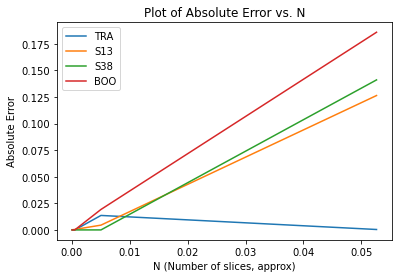

In [89]:
exact = exp(1) - exp(0)

err = dict()

for i in algName:
    e = []
    for j in range(len(N)):
        e.append(abs(est[i][j] - exact))
    err[i] = list(e)

h = [1/(i-1) for i in N]

plt.title("Plot of Absolute Error vs. N")
plt.xlabel("N (Number of slices, approx)")
plt.ylabel("Absolute Error")

for i in algName:
    plt.plot(h,err[i],label=i)

plt.legend()
plt.show()

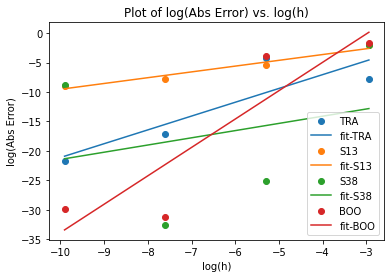

SLOPES of Linear Fit for all methods -> 
TRA: 2.3499541235610257
S13: 0.9843956712777682
S38: 1.2255291806333382
BOO: 4.82844647093632
Errors in Fit -> 
TRA: a = 0.9406534064381216, b = 6.5260772437524075
S13: a = 0.14240938687265464, b = 0.9880097042500533
S38: a = 3.2274990402737154, b = 22.391784269814252
BOO: a = 1.6518742416142271, b = 11.460394258765039


In [90]:
logErr = dict()

for i in algName:
    c = []
    for j in range(len(N)):
        c.append(log(err[i][j]))
    logErr[i] = list(c)

logH = [log(i) for i in h]

del params
del covs

params = dict()
covs = dict()

for i in algName:
    params[i], covs[i] = curve_fit(linear, logH, logErr[i])

plt.title("Plot of log(Abs Error) vs. log(h)")
plt.xlabel("log(h)")
plt.ylabel("log(Abs Error)")

for i in algName:
    plt.scatter(logH, logErr[i], label=i)
    fitY = [linear(j,params[i][0],params[i][1]) for j in logH]
    plt.plot(logH, fitY, label=str("fit-"+i))

plt.legend()
plt.show()

print("SLOPES of Linear Fit for all methods -> ")
for i in algName:
    print(f"{i}: ",end='')
    print(params[i][0])
    
print("Errors in Fit -> ")
for i in algName:
    print(f"{i}: ",end='')
    e = sqrt(diag(covs[i]))
    print(f"a = {e[0]}, b = {e[1]}")

Despite the fit for Boole's Rule being bad (compared to the others), we will rank the numerical integration rules in descending order -
1. Boole's Rule
2. Trapezoidal Rule
3. Simpson's 3/8 Rule
4. Simpson's 1/3 Rule

## Q3

In [93]:
exact = (2*pi)/(sqrt(3))
def f(x):
    return pow(x,-2/3)*pow(1-x,-1/3)

N = 300001

print("Exact Value - > ",exact)
print("Numerically integrated value -> ",simpson38_int(f,0+(1/(N-1)),1-(1/(N-1)),1/(N-1)))

Exact Value - >  3.6275987284684357
Numerically integrated value ->  3.5824231225466665


- Diptanuj Sarkar (22MS038)

Note: Name (Roll No) present in the previous two Jupyter Notebook submissions too, in the last cell.